<a href="https://colab.research.google.com/github/lorebianchi98/BrainTumorClassification/blob/main/1_CNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Classification using CNN from scratch
In this notebook we are going to perform the classification of the brain tumor using a CNN from scratch. We will try different structures, and our aim is to find the best model using a trial and error approach.

# Import and Costants

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
import numpy as np
import pandas as pd
from tensorflow import keras
import os
import shutil
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import imutils
from tqdm import tqdm
from google.colab import drive

# Connection to Google Drive

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
% run /content/gdrive/MyDrive/BrainTumorClassifier/utilities.ipynb

We also perform the download and the unzipping of the dataset from the drive folder.

In [ ]:
!unzip -q '/content/gdrive/MyDrive/BrainTumorClassifier/brain-tumor-mri-splits.zip' -d '/'

# Hardware Accelerator test

First we need to check if the hardware accelaration is enabled, since training a CNN on a CPU could be infeasible.

In [ ]:
#check hardware acceleration
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Dataset loading

Now we need to create the Dataset objects from the sets directory. We use the [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) function provided by Keras. 

In [ ]:
train_ds, val_ds, test_ds = load_data_splits(IMAGE_SIZE, BATCH_SIZE)

Found 4213 files belonging to 4 classes.
Found 1404 files belonging to 4 classes.
Found 1406 files belonging to 4 classes.


# One Dense layer with 256 neurons, One Dropout with 0.3

Now we define the model that we want to train.

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = data_augmentation_layers(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=5)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu', name='hidden_classifier') (x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model = compile_model(model, loss="sparse_categorical_crossentropy")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                             

Epoch 1/50
66/66 [==============================] - ETA: 0s - loss: 1.2015 - accuracy: 0.4125
Epoch 1: val_loss improved from inf to 0.84518, saving model to model/Dense256Neurons_OneDropout0-3.h5
66/66 [==============================] - 19s 111ms/step - loss: 1.2015 - accuracy: 0.4125 - val_loss: 0.8452 - val_accuracy: 0.6261
Epoch 2/50
66/66 [==============================] - ETA: 0s - loss: 0.7588 - accuracy: 0.6876
Epoch 2: val_loss improved from 0.84518 to 0.60243, saving model to model/Dense256Neurons_OneDropout0-3.h5
66/66 [==============================] - 7s 101ms/step - loss: 0.7588 - accuracy: 0.6876 - val_loss: 0.6024 - val_accuracy: 0.7856
Epoch 3/50
66/66 [==============================] - ETA: 0s - loss: 0.6531 - accuracy: 0.7422
Epoch 3: val_loss improved from 0.60243 to 0.51072, saving model to model/Dense256Neurons_OneDropout0-3.h5
66/66 [==============================] - 7s 101ms/step - loss: 0.6531 - accuracy: 0.7422 - val_loss: 0.5107 - val_accuracy: 0.7877
Epoch 4

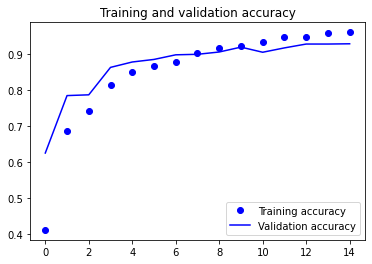

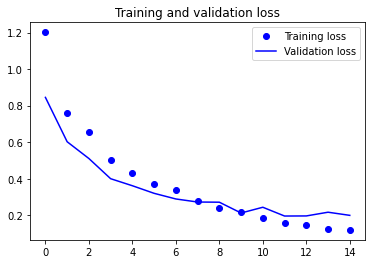

In [ ]:
model, history = run_model(model, "Dense256Neurons_OneDropout0-3", train_ds, val_ds, 50, patience=3, monitor='val_loss')
plot_accuracy_and_loss_history(history)

In [ ]:
evaluate_model(model, test_ds)

22/22 [==============================] - 2s 66ms/step - loss: 0.2174 - accuracy: 0.9139
Loss on test set: 0.21739162504673004
Accuracy on test set: 0.9139402508735657
              precision    recall  f1-score   support

      glioma     0.9055    0.9138    0.9096       325
  meningioma     0.8136    0.8754    0.8433       329
     notumor     0.9585    0.9825    0.9704       400
   pituitary     0.9777    0.8722    0.9219       352

    accuracy                         0.9139      1406
   macro avg     0.9138    0.9110    0.9113      1406
weighted avg     0.9171    0.9139    0.9145      1406



22/22 [==============================] - 1s 61ms/step


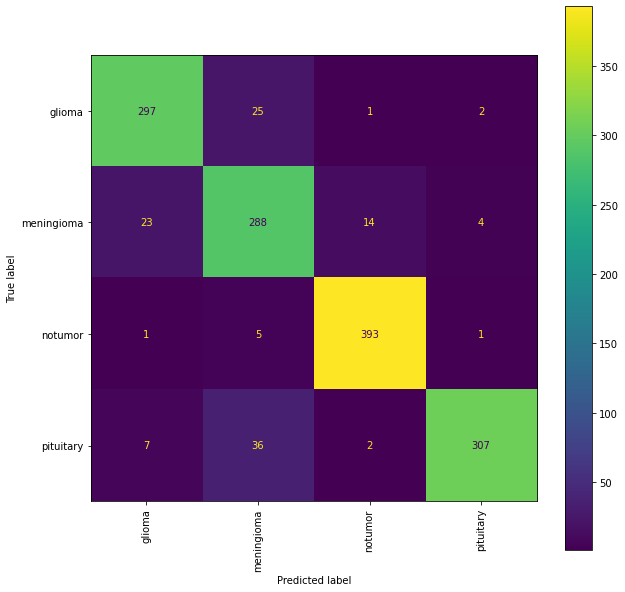

In [ ]:
plot_confusionmatrix(model, test_ds)

# One Dense layer with 128 neurons, One Dropout with 0.3

Now we define the model that we want to train.

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = data_augmentation_layers(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=5)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu', name='hidden_classifier') (x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model = compile_model(model, loss="sparse_categorical_crossentropy")
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                           

Epoch 1/50
66/66 [==============================] - ETA: 0s - loss: 1.1749 - accuracy: 0.4413
Epoch 1: val_loss improved from inf to 0.94101, saving model to model/Dense128Neurons_OneDropout0-3.h5
66/66 [==============================] - 11s 150ms/step - loss: 1.1749 - accuracy: 0.4413 - val_loss: 0.9410 - val_accuracy: 0.5484
Epoch 2/50
66/66 [==============================] - ETA: 0s - loss: 0.7480 - accuracy: 0.6940
Epoch 2: val_loss improved from 0.94101 to 0.60715, saving model to model/Dense128Neurons_OneDropout0-3.h5
66/66 [==============================] - 10s 148ms/step - loss: 0.7480 - accuracy: 0.6940 - val_loss: 0.6072 - val_accuracy: 0.7664
Epoch 3/50
66/66 [==============================] - ETA: 0s - loss: 0.6010 - accuracy: 0.7743
Epoch 3: val_loss improved from 0.60715 to 0.48818, saving model to model/Dense128Neurons_OneDropout0-3.h5
66/66 [==============================] - 10s 149ms/step - loss: 0.6010 - accuracy: 0.7743 - val_loss: 0.4882 - val_accuracy: 0.8013
Epoch

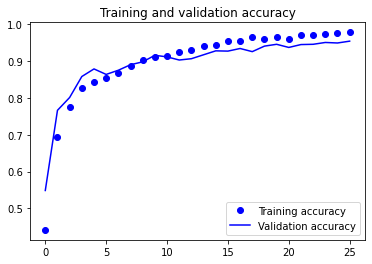

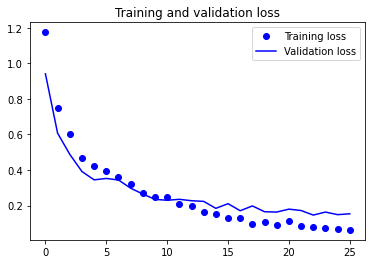

In [ ]:
model, history = run_model(model, "Dense128Neurons_OneDropout0-3", train_ds, val_ds, 50, patience=3, monitor='val_loss')
plot_accuracy_and_loss_history(history)

In [ ]:
evaluate_model(model, test_ds)

22/22 [==============================] - 12s 85ms/step - loss: 0.1659 - accuracy: 0.9467
Loss on test set: 0.16589902341365814
Accuracy on test set: 0.9466571807861328
              precision    recall  f1-score   support

      glioma     0.9132    0.9385    0.9256       325
  meningioma     0.8985    0.9149    0.9066       329
     notumor     0.9825    0.9850    0.9838       400
   pituitary     0.9851    0.9403    0.9622       352

    accuracy                         0.9467      1406
   macro avg     0.9448    0.9447    0.9446      1406
weighted avg     0.9475    0.9467    0.9469      1406



22/22 [==============================] - 2s 75ms/step


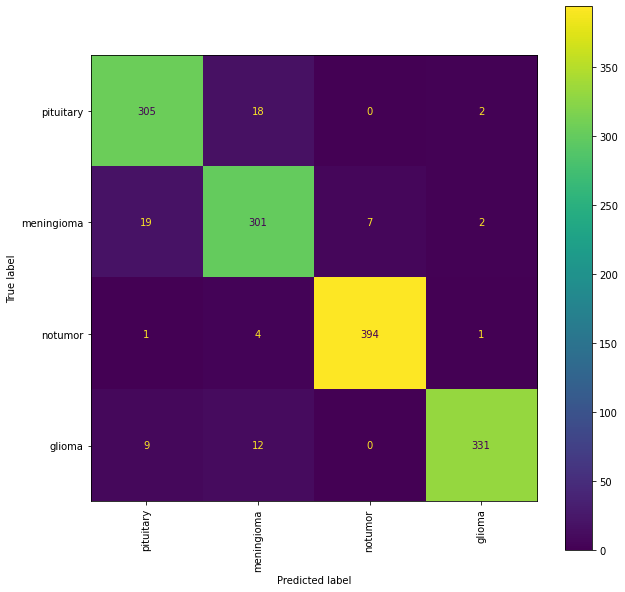

In [ ]:
plot_confusionmatrix(model, test_ds)

# One Dense layer with 512 neurons, One Dropout with 0.3

Now we define the model that we want to train.

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = data_augmentation_layers(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=5)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu', name='hidden_classifier') (x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model = compile_model(model, loss="sparse_categorical_crossentropy")
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                           

Epoch 1/50
66/66 [==============================] - ETA: 0s - loss: 1.1048 - accuracy: 0.4790
Epoch 1: val_loss improved from inf to 0.77765, saving model to model/Dense512Neurons_OneDropout0-3.h5
66/66 [==============================] - 11s 153ms/step - loss: 1.1048 - accuracy: 0.4790 - val_loss: 0.7777 - val_accuracy: 0.7158
Epoch 2/50
66/66 [==============================] - ETA: 0s - loss: 0.7255 - accuracy: 0.7164
Epoch 2: val_loss improved from 0.77765 to 0.59774, saving model to model/Dense512Neurons_OneDropout0-3.h5
66/66 [==============================] - 10s 152ms/step - loss: 0.7255 - accuracy: 0.7164 - val_loss: 0.5977 - val_accuracy: 0.7792
Epoch 3/50
66/66 [==============================] - ETA: 0s - loss: 0.5379 - accuracy: 0.7982
Epoch 3: val_loss did not improve from 0.59774
66/66 [==============================] - 10s 153ms/step - loss: 0.5379 - accuracy: 0.7982 - val_loss: 0.6524 - val_accuracy: 0.7564
Epoch 4/50
66/66 [==============================] - ETA: 0s - los

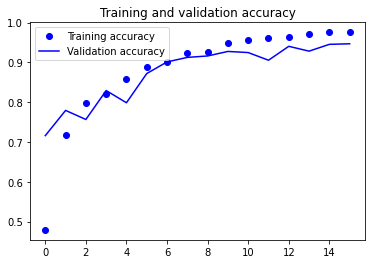

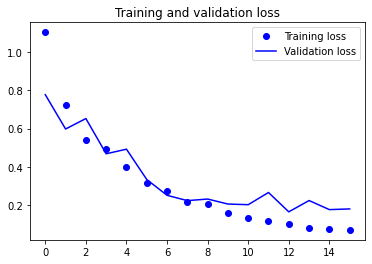

In [ ]:
model, history = run_model(model, "Dense512Neurons_OneDropout0-3", train_ds, val_ds, 50, patience=3, monitor='val_loss')
plot_accuracy_and_loss_history(history)

In [ ]:
evaluate_model(model, test_ds)

22/22 [==============================] - 11s 74ms/step - loss: 0.1731 - accuracy: 0.9481
Loss on test set: 0.17310363054275513
Accuracy on test set: 0.9480796456336975
              precision    recall  f1-score   support

      glioma     0.9589    0.9323    0.9454       325
  meningioma     0.9297    0.8845    0.9065       329
     notumor     0.9523    0.9975    0.9744       400
   pituitary     0.9497    0.9659    0.9577       352

    accuracy                         0.9481      1406
   macro avg     0.9476    0.9451    0.9460      1406
weighted avg     0.9479    0.9481    0.9476      1406



22/22 [==============================] - 2s 73ms/step


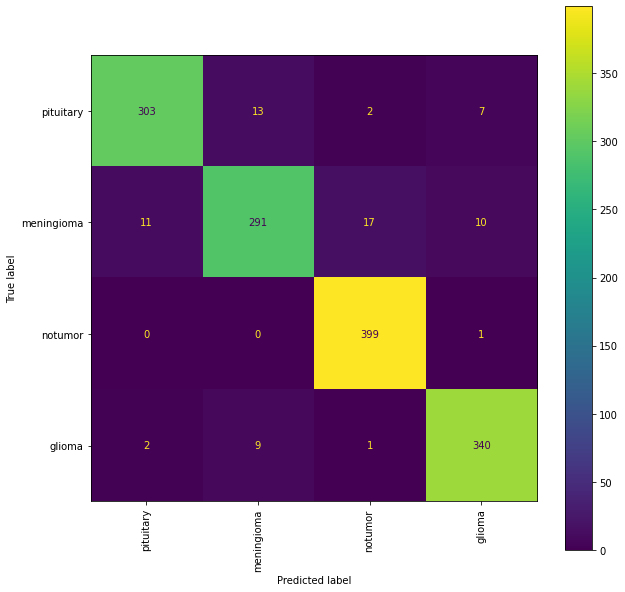

In [ ]:
plot_confusionmatrix(model, test_ds)

# One Dense layer with 512 neurons, One Dropout with 0.5

Now we define the model that we want to train.

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = data_augmentation_layers(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=5)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu', name='hidden_classifier') (x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model = compile_model(model, loss="sparse_categorical_crossentropy")
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 64)      18496     
                                                           

Epoch 1/50
66/66 [==============================] - ETA: 0s - loss: 1.1455 - accuracy: 0.4529
Epoch 1: val_loss improved from inf to 0.83994, saving model to model/Dense512Neurons_OneDropout0-5.h5
66/66 [==============================] - 11s 153ms/step - loss: 1.1455 - accuracy: 0.4529 - val_loss: 0.8399 - val_accuracy: 0.6631
Epoch 2/50
66/66 [==============================] - ETA: 0s - loss: 0.7563 - accuracy: 0.7021
Epoch 2: val_loss improved from 0.83994 to 0.62915, saving model to model/Dense512Neurons_OneDropout0-5.h5
66/66 [==============================] - 10s 153ms/step - loss: 0.7563 - accuracy: 0.7021 - val_loss: 0.6291 - val_accuracy: 0.7557
Epoch 3/50
66/66 [==============================] - ETA: 0s - loss: 0.5730 - accuracy: 0.7833
Epoch 3: val_loss improved from 0.62915 to 0.43186, saving model to model/Dense512Neurons_OneDropout0-5.h5
66/66 [==============================] - 10s 153ms/step - loss: 0.5730 - accuracy: 0.7833 - val_loss: 0.4319 - val_accuracy: 0.8412
Epoch

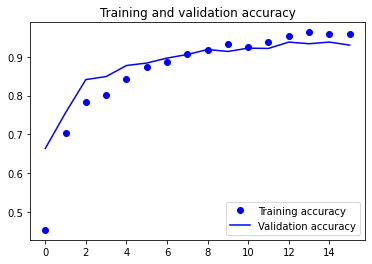

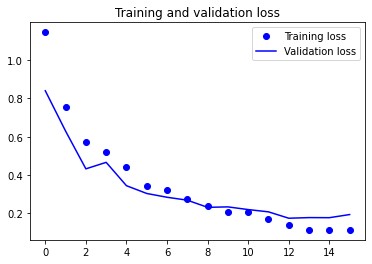

In [ ]:
model, history = run_model(model, "Dense512Neurons_OneDropout0-5", train_ds, val_ds, 50, patience=3, monitor='val_loss')
plot_accuracy_and_loss_history(history)

In [ ]:
evaluate_model(model, test_ds)

22/22 [==============================] - 2s 63ms/step - loss: 0.1903 - accuracy: 0.9339
Loss on test set: 0.19032692909240723
Accuracy on test set: 0.933854877948761
              precision    recall  f1-score   support

      glioma     0.9631    0.8831    0.9213       325
  meningioma     0.8612    0.9240    0.8915       329
     notumor     0.9496    0.9900    0.9694       400
   pituitary     0.9645    0.9261    0.9449       352

    accuracy                         0.9339      1406
   macro avg     0.9346    0.9308    0.9318      1406
weighted avg     0.9358    0.9339    0.9339      1406



22/22 [==============================] - 2s 71ms/step


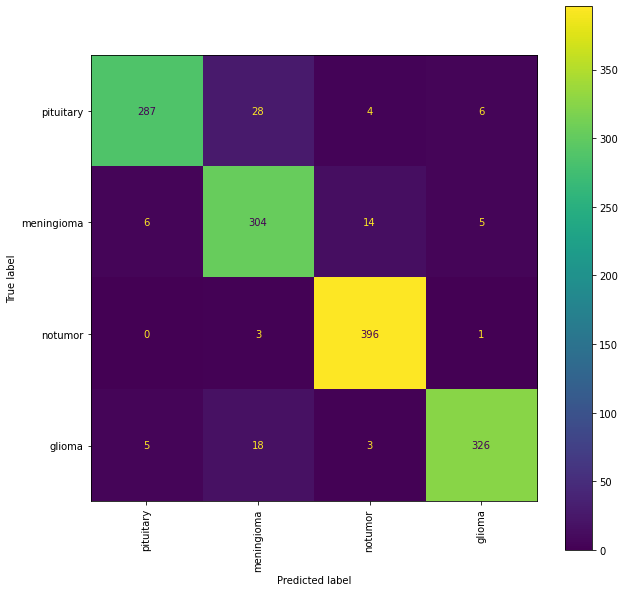

In [ ]:
plot_confusionmatrix(model, test_ds)

# One Conv2D layer with 256 filters, One Dropout with 0.3

Now we define the model that we want to train.

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = data_augmentation_layers(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=3)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model = compile_model(model, loss="sparse_categorical_crossentropy")
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 64)      18496     
                                                           

Epoch 1/50
66/66 [==============================] - ETA: 0s - loss: 1.1586 - accuracy: 0.4553
Epoch 1: val_loss improved from inf to 1.01144, saving model to model/Conv2D256Filters_OneDropout0-3.h5
66/66 [==============================] - 11s 154ms/step - loss: 1.1586 - accuracy: 0.4553 - val_loss: 1.0114 - val_accuracy: 0.6161
Epoch 2/50
66/66 [==============================] - ETA: 0s - loss: 0.7762 - accuracy: 0.6950
Epoch 2: val_loss improved from 1.01144 to 0.60666, saving model to model/Conv2D256Filters_OneDropout0-3.h5
66/66 [==============================] - 10s 150ms/step - loss: 0.7762 - accuracy: 0.6950 - val_loss: 0.6067 - val_accuracy: 0.7657
Epoch 3/50
66/66 [==============================] - ETA: 0s - loss: 0.5829 - accuracy: 0.7726
Epoch 3: val_loss did not improve from 0.60666
66/66 [==============================] - 10s 150ms/step - loss: 0.5829 - accuracy: 0.7726 - val_loss: 0.6186 - val_accuracy: 0.7457
Epoch 4/50
66/66 [==============================] - ETA: 0s - l

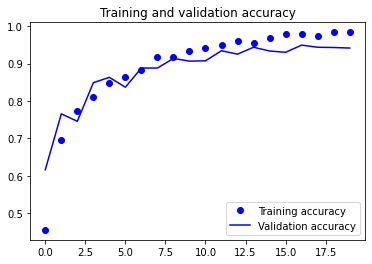

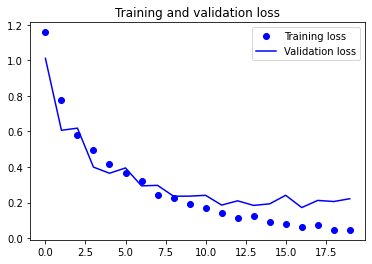

In [ ]:
model, history = run_model(model, "Conv2D256Filters_OneDropout0-3", train_ds, val_ds, 50, patience=3, monitor='val_loss')
plot_accuracy_and_loss_history(history)

In [ ]:
evaluate_model(model, test_ds)

22/22 [==============================] - 2s 63ms/step - loss: 0.1875 - accuracy: 0.9395
Loss on test set: 0.18747489154338837
Accuracy on test set: 0.9395447969436646
              precision    recall  f1-score   support

      glioma     0.9294    0.9323    0.9309       325
  meningioma     0.9042    0.8602    0.8816       329
     notumor     0.9662    1.0000    0.9828       400
   pituitary     0.9490    0.9517    0.9504       352

    accuracy                         0.9395      1406
   macro avg     0.9372    0.9360    0.9364      1406
weighted avg     0.9389    0.9395    0.9390      1406



22/22 [==============================] - 2s 69ms/step


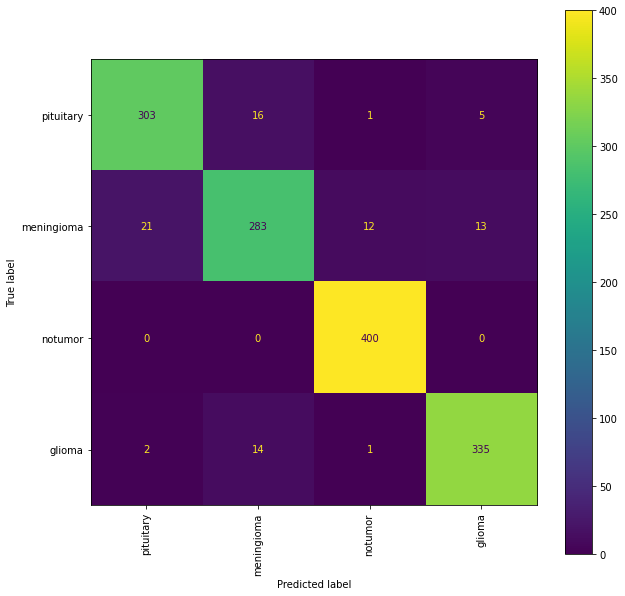

In [ ]:
plot_confusionmatrix(model, test_ds)

# One Conv2D layer with 256 filters, Two Dropouts with 0.3

Now we define the model that we want to train.

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = data_augmentation_layers(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=3)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model = compile_model(model, loss="sparse_categorical_crossentropy")
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 109, 109, 64)      18496     
                                                           

Epoch 1/50
66/66 [==============================] - ETA: 0s - loss: 1.1458 - accuracy: 0.4579
Epoch 1: val_loss improved from inf to 0.83912, saving model to model/Conv2D256Filters_TwoDropouts0-3.h5
66/66 [==============================] - 11s 155ms/step - loss: 1.1458 - accuracy: 0.4579 - val_loss: 0.8391 - val_accuracy: 0.6595
Epoch 2/50
66/66 [==============================] - ETA: 0s - loss: 0.7520 - accuracy: 0.7005
Epoch 2: val_loss improved from 0.83912 to 0.59759, saving model to model/Conv2D256Filters_TwoDropouts0-3.h5
66/66 [==============================] - 11s 156ms/step - loss: 0.7520 - accuracy: 0.7005 - val_loss: 0.5976 - val_accuracy: 0.7735
Epoch 3/50
66/66 [==============================] - ETA: 0s - loss: 0.5862 - accuracy: 0.7788
Epoch 3: val_loss improved from 0.59759 to 0.49192, saving model to model/Conv2D256Filters_TwoDropouts0-3.h5
66/66 [==============================] - 11s 156ms/step - loss: 0.5862 - accuracy: 0.7788 - val_loss: 0.4919 - val_accuracy: 0.8226

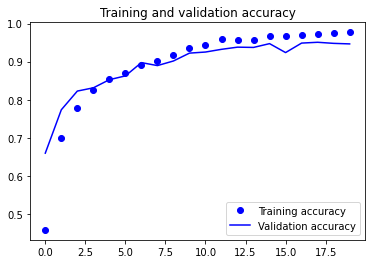

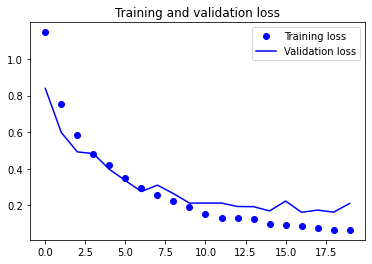

In [ ]:
model, history = run_model(model, "Conv2D256Filters_TwoDropouts0-3", train_ds, val_ds, 50, patience=3, monitor='val_loss')
plot_accuracy_and_loss_history(history)

In [ ]:
model = models.load_model(MODELS_PATH + "/Conv2D256Filters_TwoDropouts0-3/Conv2D256Filters_TwoDropouts0-3.h5")

In [ ]:
evaluate_model(model, test_ds)

22/22 [==============================] - 2s 64ms/step - loss: 0.1611 - accuracy: 0.9481
Loss on test set: 0.161067932844162
Accuracy on test set: 0.9480796456336975
              precision    recall  f1-score   support

      glioma     0.9078    0.9692    0.9375       325
  meningioma     0.9295    0.8815    0.9048       329
     notumor     0.9777    0.9850    0.9813       400
   pituitary     0.9709    0.9489    0.9598       352

    accuracy                         0.9481      1406
   macro avg     0.9465    0.9461    0.9459      1406
weighted avg     0.9486    0.9481    0.9479      1406



22/22 [==============================] - 2s 70ms/step


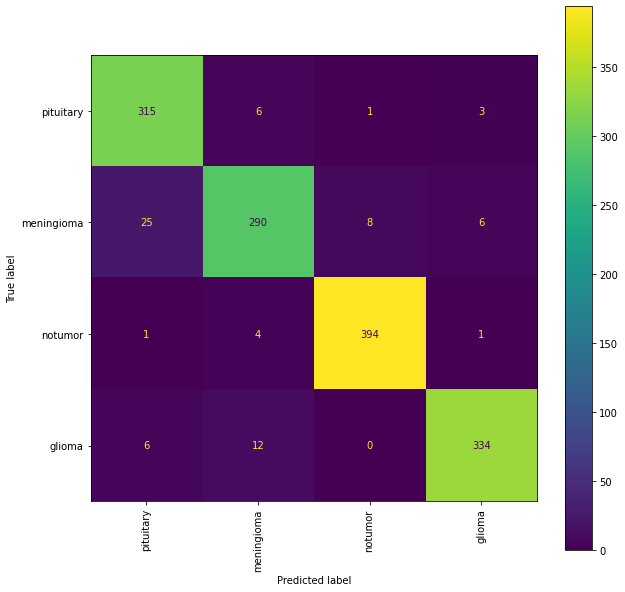

In [ ]:
plot_confusionmatrix(model, test_ds)

# One Conv2D layer with 512 filters, Two Dropouts with 0.3, Additional layer

Now we define the model that we want to train.

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = data_augmentation_layers(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, padding='same', kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, padding='same', kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, padding='same', kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, padding='same', kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=3)(x)
x = layers.Conv2D(filters=512, padding='same', kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=3)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(filters=512, padding='same', kernel_size=3, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model = compile_model(model, loss="sparse_categorical_crossentropy")
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_10 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_46 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 112, 112, 64)      18496     
                                                           

Epoch 1/50
66/66 [==============================] - ETA: 0s - loss: 1.1663 - accuracy: 0.4515
Epoch 1: val_loss improved from inf to 0.88793, saving model to model/Conv2D512Filters_TwoDropouts0-3.h5
66/66 [==============================] - 16s 198ms/step - loss: 1.1663 - accuracy: 0.4515 - val_loss: 0.8879 - val_accuracy: 0.6546
Epoch 2/50
66/66 [==============================] - ETA: 0s - loss: 0.8022 - accuracy: 0.6596
Epoch 2: val_loss improved from 0.88793 to 0.60291, saving model to model/Conv2D512Filters_TwoDropouts0-3.h5
66/66 [==============================] - 11s 165ms/step - loss: 0.8022 - accuracy: 0.6596 - val_loss: 0.6029 - val_accuracy: 0.7785
Epoch 3/50
66/66 [==============================] - ETA: 0s - loss: 0.5820 - accuracy: 0.7700
Epoch 3: val_loss did not improve from 0.60291
66/66 [==============================] - 11s 165ms/step - loss: 0.5820 - accuracy: 0.7700 - val_loss: 0.7255 - val_accuracy: 0.7101
Epoch 4/50
66/66 [==============================] - ETA: 0s -

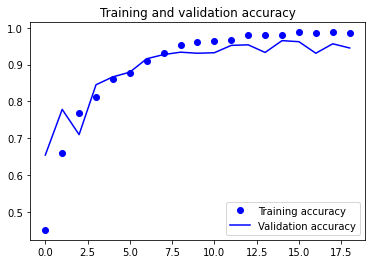

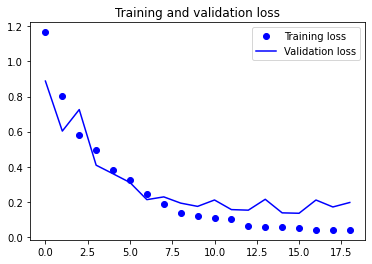

In [ ]:
model, history = run_model(model, "Conv2D512Filters_TwoDropouts0-3", train_ds, val_ds, 50, patience=3, monitor='val_loss')
plot_accuracy_and_loss_history(history)

In [ ]:
evaluate_model(model, test_ds)

22/22 [==============================] - 2s 72ms/step - loss: 0.1541 - accuracy: 0.9538
Loss on test set: 0.15409797430038452
Accuracy on test set: 0.9537695646286011
              precision    recall  f1-score   support

      glioma     0.9538    0.9538    0.9538       325
  meningioma     0.9452    0.8906    0.9171       329
     notumor     0.9523    0.9975    0.9744       400
   pituitary     0.9631    0.9631    0.9631       352

    accuracy                         0.9538      1406
   macro avg     0.9536    0.9512    0.9521      1406
weighted avg     0.9537    0.9538    0.9534      1406



22/22 [==============================] - 2s 78ms/step


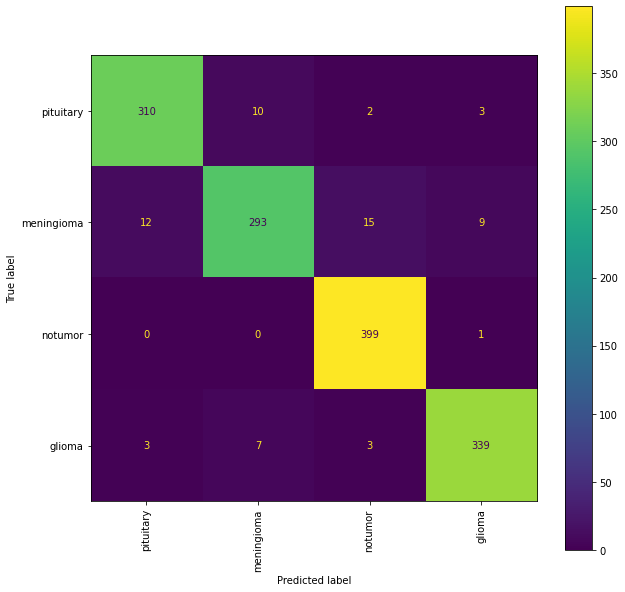

In [ ]:
plot_confusionmatrix(model, test_ds)

# One Dense layer with 512 neurons, Two Dropouts with 0.3, Additional layer

Now we define the model that we want to train.

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = data_augmentation_layers(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, padding='same', kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, padding='same', kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, padding='same', kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, padding='same', kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=3)(x)
x = layers.Conv2D(filters=512, padding='same', kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=3)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(512, activation='relu', name='hidden_classifier')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model = compile_model(model, loss="sparse_categorical_crossentropy")
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_12 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_57 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 112, 112, 64)      18496     
                                                          

Epoch 1/50
66/66 [==============================] - ETA: 0s - loss: 1.1012 - accuracy: 0.4776
Epoch 1: val_loss improved from inf to 0.87358, saving model to model/Dense512Neurons_TwoDropouts0-3_AdditionalLayer.h5
66/66 [==============================] - 12s 161ms/step - loss: 1.1012 - accuracy: 0.4776 - val_loss: 0.8736 - val_accuracy: 0.6211
Epoch 2/50
66/66 [==============================] - ETA: 0s - loss: 0.7430 - accuracy: 0.6969
Epoch 2: val_loss improved from 0.87358 to 0.64165, saving model to model/Dense512Neurons_TwoDropouts0-3_AdditionalLayer.h5
66/66 [==============================] - 11s 160ms/step - loss: 0.7430 - accuracy: 0.6969 - val_loss: 0.6417 - val_accuracy: 0.7464
Epoch 3/50
66/66 [==============================] - ETA: 0s - loss: 0.5534 - accuracy: 0.7850
Epoch 3: val_loss improved from 0.64165 to 0.44315, saving model to model/Dense512Neurons_TwoDropouts0-3_AdditionalLayer.h5
66/66 [==============================] - 11s 161ms/step - loss: 0.5534 - accuracy: 0.7

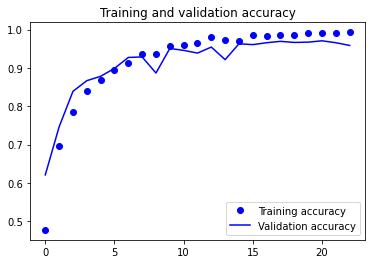

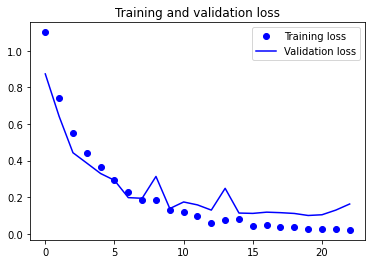

In [ ]:
model, history = run_model(model, "Dense512Neurons_TwoDropouts0-3_AdditionalLayer", train_ds, val_ds, 50, patience=3, monitor='val_loss')
plot_accuracy_and_loss_history(history)

In [ ]:
evaluate_model(model, test_ds)

22/22 [==============================] - 2s 66ms/step - loss: 0.1380 - accuracy: 0.9623
Loss on test set: 0.13795408606529236
Accuracy on test set: 0.962304413318634
              precision    recall  f1-score   support

      glioma     0.9601    0.9631    0.9616       325
  meningioma     0.9281    0.9422    0.9351       329
     notumor     0.9826    0.9875    0.9850       400
   pituitary     0.9738    0.9517    0.9626       352

    accuracy                         0.9623      1406
   macro avg     0.9612    0.9611    0.9611      1406
weighted avg     0.9625    0.9623    0.9623      1406



22/22 [==============================] - 2s 77ms/step


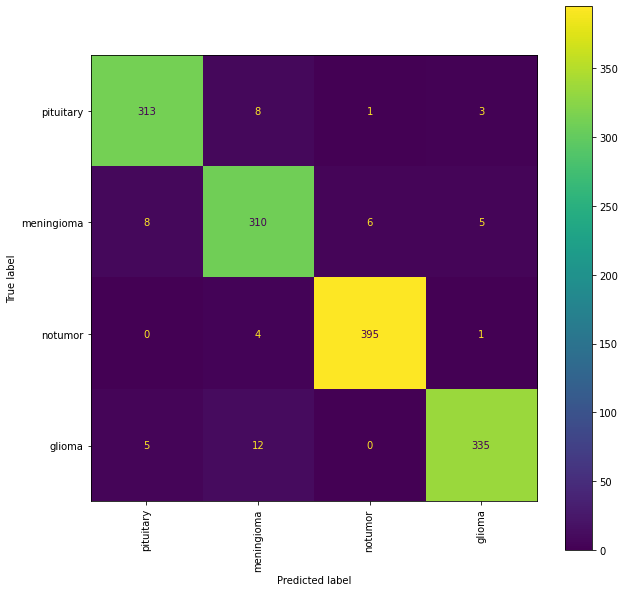

In [ ]:
plot_confusionmatrix(model, test_ds)

# Two Dense layer with 512 neurons, Two Dropouts with 0.3, Additional layer

Now we define the model that we want to train.

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = data_augmentation_layers(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, padding='same', kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, padding='same', kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, padding='same', kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, padding='same', kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=3)(x)
x = layers.Conv2D(filters=512, padding='same', kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=3)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu', name='hidden_classifier0')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(512, activation='relu', name='hidden_classifier1')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model = compile_model(model, loss="sparse_categorical_crossentropy")
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_13 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_62 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 112, 112, 64)      18496     
                                                          

Epoch 1/50
66/66 [==============================] - ETA: 0s - loss: 1.1668 - accuracy: 0.4313
Epoch 1: val_loss improved from inf to 0.87245, saving model to model/TwoDense512Neurons_TwoDropouts0-3_AdditionalLayer.h5
66/66 [==============================] - 12s 161ms/step - loss: 1.1668 - accuracy: 0.4313 - val_loss: 0.8724 - val_accuracy: 0.6353
Epoch 2/50
66/66 [==============================] - ETA: 0s - loss: 0.8799 - accuracy: 0.6167
Epoch 2: val_loss improved from 0.87245 to 0.69889, saving model to model/TwoDense512Neurons_TwoDropouts0-3_AdditionalLayer.h5
66/66 [==============================] - 11s 159ms/step - loss: 0.8799 - accuracy: 0.6167 - val_loss: 0.6989 - val_accuracy: 0.7158
Epoch 3/50
66/66 [==============================] - ETA: 0s - loss: 0.6683 - accuracy: 0.7270
Epoch 3: val_loss improved from 0.69889 to 0.54309, saving model to model/TwoDense512Neurons_TwoDropouts0-3_AdditionalLayer.h5
66/66 [==============================] - 11s 161ms/step - loss: 0.6683 - accu

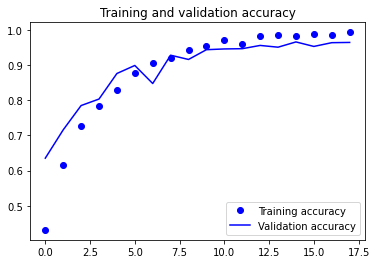

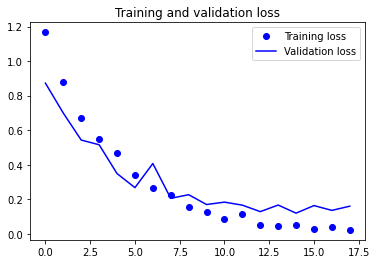

In [ ]:
model, history = run_model(model, "TwoDense512Neurons_TwoDropouts0-3_AdditionalLayer", train_ds, val_ds, 50, patience=3, monitor='val_loss')
plot_accuracy_and_loss_history(history)

In [ ]:
model = models.load_model(MODELS_PATH + "/Dense512Neurons_OneDropout0-5/Dense512Neurons_OneDropout0-5.h5")

In [ ]:
evaluate_model(model, test_ds)

22/22 [==============================] - 2s 71ms/step - loss: 0.1433 - accuracy: 0.9573
Loss on test set: 0.1432587206363678
Accuracy on test set: 0.9573257565498352
              precision    recall  f1-score   support

   pituitary       0.97      0.94      0.96       325
  meningioma       0.93      0.92      0.93       329
     notumor       0.97      0.99      0.98       400
      glioma       0.96      0.96      0.96       352

    accuracy                           0.96      1406
   macro avg       0.96      0.96      0.96      1406
weighted avg       0.96      0.96      0.96      1406



22/22 [==============================] - 2s 75ms/step


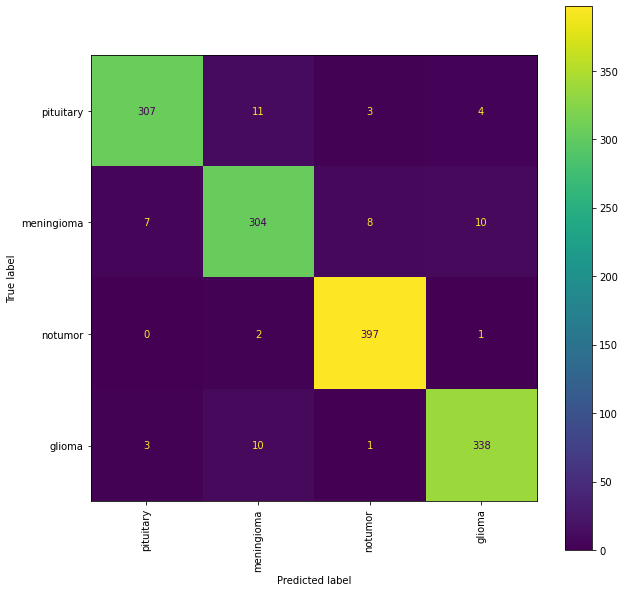

In [ ]:
plot_confusionmatrix(model, test_ds)